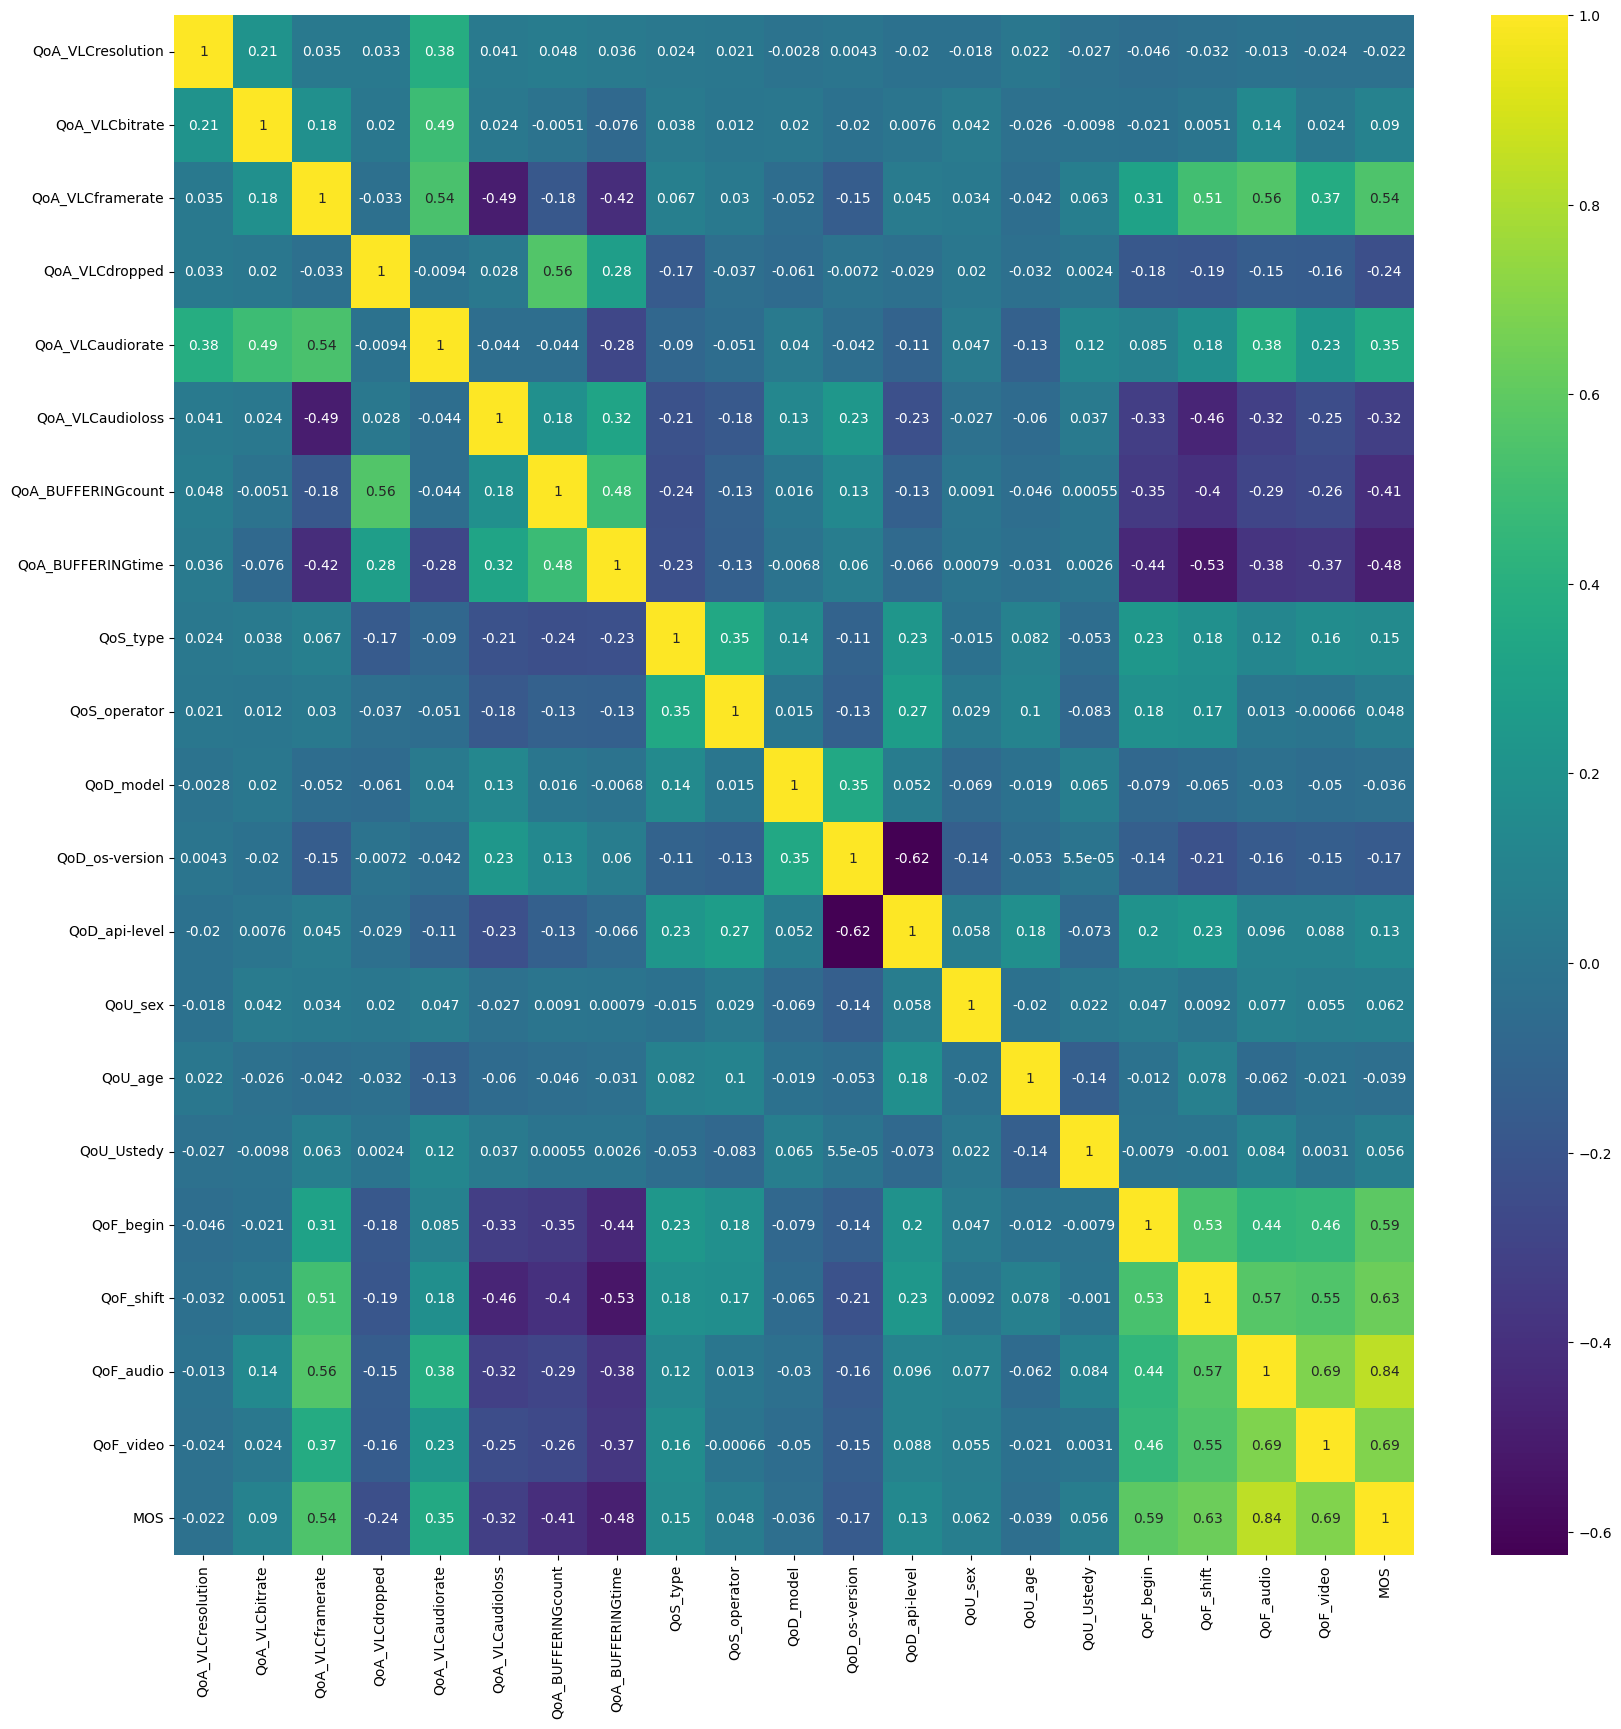

In [31]:
# let's see the heatmap of the correlation of the columns
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

User segmentation by quality of experience (QoE) patterns is a valuable analysis technique for this dataset. 
Here is how we should get started:

1. Feature Selection
   - Identify columns relating to user feedback, perceptions (QoF_*) 
   - Add relevant params like video quality, stall events etc.

2. Clustering 
   - Apply K-Means clustering to group users based on selected features
   - Determine optimal clusters (K) through elbow plot method 

3. Analyze Clusters
   - Profile each cluster segregated by QoE patterns
     e.g. Cluster 1 - High quality, low stalls

   - Compare cluster-level statistics for distribution of ratings, events faced etc.  

4. Validate Clusters
   - Check if cluster assignments correlate to overall MOS groups
   - For example, a "bad QoE" cluster should have lower MOS scores

Key Outcomes:
- User subgroups based on their subjective QoE evaluations  
- Tailored enhancements to address issues faced per each profile
- Targeted marketing and promotions to specific user segments
- Better understanding of user behavior and preferences
- Insights into factors impacting QoE for different user groups



In [32]:
# let's start wih Feature selection
# we have to identify the columns relating to user feedback , perceptions and quality of experience
#add relevant columns like video quality, stall events, etc. to the feature set

#let's see the columns again
df.columns

Index(['QoA_VLCresolution', 'QoA_VLCbitrate', 'QoA_VLCframerate',
       'QoA_VLCdropped', 'QoA_VLCaudiorate', 'QoA_VLCaudioloss',
       'QoA_BUFFERINGcount', 'QoA_BUFFERINGtime', 'QoS_type', 'QoS_operator',
       'QoD_model', 'QoD_os-version', 'QoD_api-level', 'QoU_sex', 'QoU_age',
       'QoU_Ustedy', 'QoF_begin', 'QoF_shift', 'QoF_audio', 'QoF_video',
       'MOS'],
      dtype='object')

In [71]:
#let's see what QoF_begin cloumns looks like
df['QoF_begin'].unique()

array([3, 4, 5, 2, 1], dtype=int64)

 The `QoF_begin` column in the dataset refers to the user feedback rating on the video playback start time, based on the documentation.

The unique values array `[3, 4, 5, 2, 1]` indicates:

- These are the 5 rating levels provided by the users for the playback start time 
- It ranges from 1 (bad) to 5 (excellent)

Specific interpretations:

- Rating 5 - Playback started instantly 
- Rating 3 - Some minor delay at start
- Rating 1 - Excessive delay before video played  

A few reasons for the distribution across ratings that we observe:

- Network conditions impact initial buffering delay
- Device performance affects loading time 
- Video complexity influences readiness  

Since first impressions are important, analyzing user feedback on startup time and its correlation to overall QoE can provide insights into:

- Optimizing initial buffers for instant playback
- Reducing playback latency on slower devices 
- Selecting bitrates based on device and network  


#

In [72]:
#let's see what QoF_shift 
df['QoF_shift'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

# The `QoF_shift` column in the dataset refers to the user feedback rating on video quality shifts during the streaming session, as per my understanding.

The unique values array [5, 4, 3, 2, 1] indicates:

- Users had the option to rate quality shifts on a scale of 1 (Bad) to 5 (Excellent)
- It covers the full range of possible ratings

Interpretation of ratings:

- 5 - No perceived quality shifts
- 3 - Some distracting shifts 
- 1 - Frequent, jarring quality switches

Some reasons for variability in user ratings:  

- Adaptive bitrate switching causes shifts between qualities
- Network throughput changes trigger rate adaptations
- Device display and hardware constrain renditions

Analyzing feedback on quality shifts and correlation to overall QoE can provide insights into:

- Optimizing rate adaptation logic for smooth, less radical shifts 
- Improving adaptation performance through intelligent switch thresholds
- Selecting video representations aligned to network/device profiles



In [73]:
#QoF_audio and QoF_video 
df['QoF_audio'].unique()

array([3, 5, 4, 2, 1], dtype=int64)

 The `QoF_audio` column captures the user feedback rating for audio quality during the video streaming session.  

The unique rating values [3, 5, 4, 2, 1] indicate:

- Users rated audio quality on scale of 1 (Bad) to 5 (Excellent)
- Full range of rating options provided

Interpretation:

- 5 - Excellent audio quality 
- 3 - Acceptable audio but some issues
- 1 - Inaudible or largely corrupted audio

Potential factors affecting audio ratings:

- Encoding bitrates and codecs used
- Packet loss causing audio distortion
- Hardware/software audio rendering 
- Environment/context noise levels

By analyzing user feedback on audio along with overall QoE, we can gain insights into:

- Perceived importance of audio vs video quality
- Sensitivity of users to audio impairments 
- Diagnosing specific audio encoding/delivery issues
- Benchmarking audio performance across devices

The distribution of ratings helps estimate user satisfaction with audio experience.



In [74]:
#let's see the unique values of QoF_video
df['QoF_video'].unique()

array([4, 5, 3, 2, 1], dtype=int64)

 The `QoF_video` column in the dataset represents the user feedback rating specifically for the video quality aspects during the streaming session.

The unique rating values: 
[4, 5, 3, 2, 1]

This indicates:

- Users rated video quality on a scale of 1 (Bad) to 5 (Excellent)
- Full spectrum of possible ratings provided 

Interpretation:

- 5 - Excellent video quality
- 3 - Acceptable but noticeable issues  
- 1 - Extremely poor, unusable video

Potential factors affecting variations in video quality ratings:

- Video resolution and encoding bitrates
- Frame drops due to network issues
- Device display characteristics and hardware constraints
- Playback stalls and adaptiveness 

Analyzing subjective video quality ratings against technical parameters can give insights into:

- Perceptual impact of resolutions, bitrates, frame rates
- Sensitivity to video freezes and stalls
- Device-dependent quality perceptions
- Diagnosing specific video encoding/delivery problems  



In [75]:
# let's use only use all QoU and QoF columns
#let's create a list of the columns

segment_df = df[['QoU_sex', 'QoU_age',
       'QoU_Ustedy', 'QoF_begin', 'QoF_shift', 'QoF_audio', 'QoF_video',
       'MOS']]

In [76]:
#let's see the first 5 rows of the data
segment_df.head()

,QoU_sex,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS
0,1,20,5,3,5,3,4,3
1,1,25,5,4,5,5,5,5
2,1,22,5,3,5,4,4,4
3,1,31,5,4,5,5,5,5
4,0,26,5,5,5,4,5,5


In [77]:
#let's see the shape of the data
segment_df.shape

(1543, 8)

In [78]:
#let's see the info of the data
segment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   QoU_sex     1543 non-null   int64
 1   QoU_age     1543 non-null   int64
 2   QoU_Ustedy  1543 non-null   int64
 3   QoF_begin   1543 non-null   int64
 4   QoF_shift   1543 non-null   int64
 5   QoF_audio   1543 non-null   int64
 6   QoF_video   1543 non-null   int64
 7   MOS         1543 non-null   int64
dtypes: int64(8)
memory usage: 96.6 KB


In [79]:
#let's see the summary statistics of the data
segment_df.describe()


,QoU_sex,QoU_age,QoU_Ustedy,QoF_begin,QoF_shift,QoF_audio,QoF_video,MOS
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,0.855476,29.179520,4.882048,3.533377,4.523655,3.738820,3.884640,3.702528
std,0.351734,8.006615,0.471312,1.025622,0.953146,1.006382,0.887098,1.056283
min,0.000000,14.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,25.000000,5.000000,3.000000,4.000000,3.000000,4.000000,3.000000
50%,1.000000,27.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000
75%,1.000000,30.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000
max,1.000000,55.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [80]:
# let's see the distribution of the target variable
segment_df['MOS'].value_counts()

MOS
4    784
5    302
3    246
2    118
1     93
Name: count, dtype: int64

In [81]:
# now let's train test split the data
from sklearn.model_selection import train_test_split
X = segment_df.drop('MOS',axis=1)
y = segment_df['MOS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)




In [82]:
# let's see the shape of the train and test data
print(X_train.shape)

(1080, 7)


In [83]:
# let's see the shape of the train and test data
print(X_test.shape)

(463, 7)


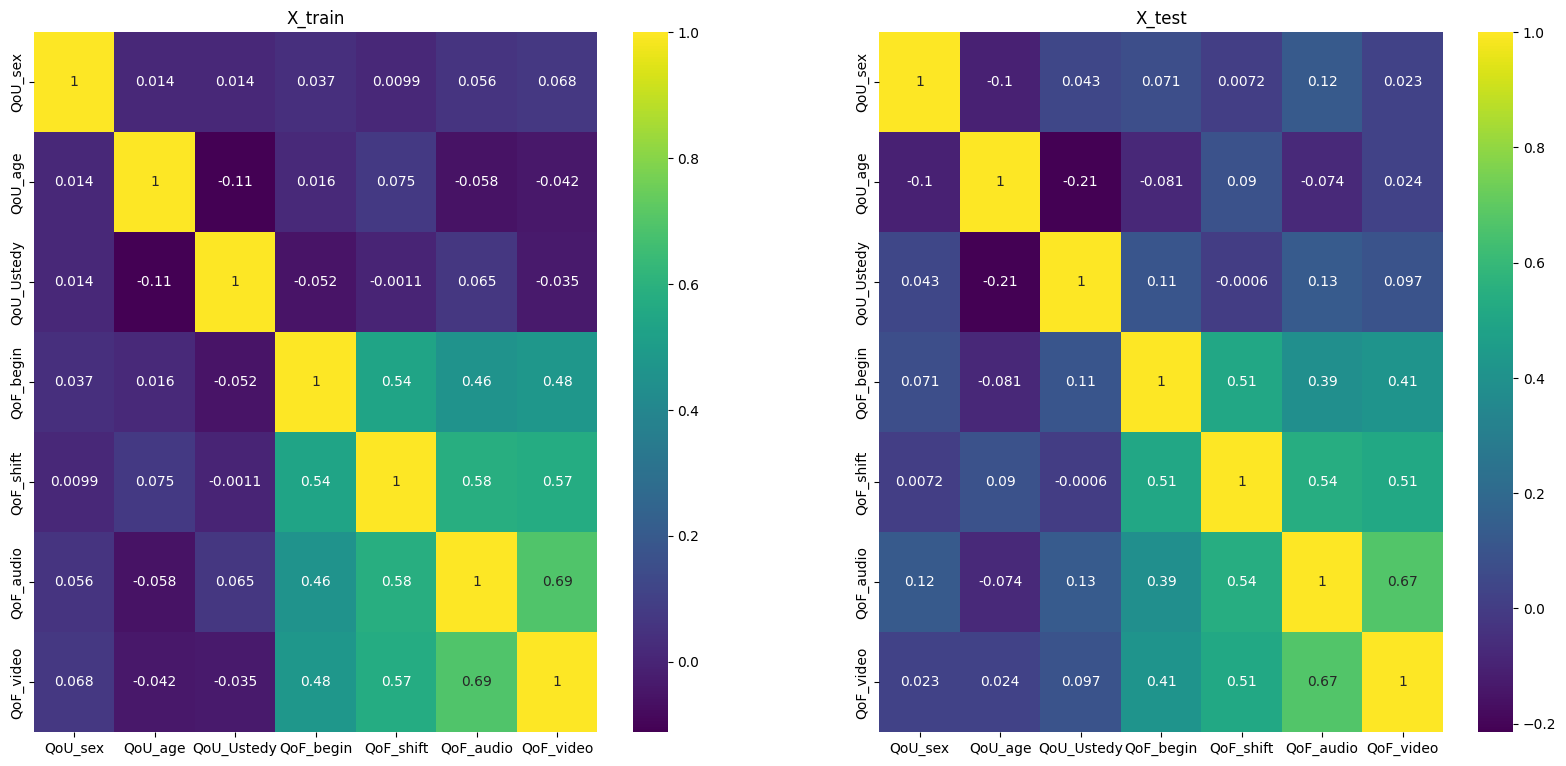

In [84]:
#now let's visualize the train and test data
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.title('X_train')
sns.heatmap(X_train.corr(), annot=True, cmap='viridis')
plt.subplot(2,2,2)
plt.title('X_test')
sns.heatmap(X_test.corr(), annot=True, cmap='viridis')
plt.show()


looks good!


In [85]:
#now let's use k-means to cluster the data based on the target variable
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
kmeans.cluster_centers_


array([[ 0.88655462, 21.05462185,  4.83613445,  3.45798319,  4.36554622,
         3.71428571,  3.92436975],
       [ 0.86516854, 44.62359551,  4.66292135,  3.49438202,  4.54494382,
         3.60674157,  3.85393258],
       [ 0.84036145, 28.27861446,  4.95783133,  3.54819277,  4.54819277,
         3.79518072,  3.90060241]])

In [86]:
#let's see the labels
kmeans.labels_

array([2, 0, 2, ..., 2, 2, 2])

In [87]:
#let's see the inertia
kmeans.inertia_

16215.806658557569

In [88]:
#let's see the silhouette score
from sklearn.metrics import silhouette_score

In [89]:
#let's see the silhouette score
silhouette_score(X_train,kmeans.labels_)

0.4612772994699564

Silhouette score for 2 clusters is 0.6642583167790189
Silhouette score for 3 clusters is 0.43110792810785215
Silhouette score for 4 clusters is 0.47203228064797614
Silhouette score for 5 clusters is 0.4075243708801069
Silhouette score for 6 clusters is 0.43183641918172877
Silhouette score for 7 clusters is 0.4230519377705377
Silhouette score for 8 clusters is 0.3346462672557333
Silhouette score for 9 clusters is 0.3551563560684741
Silhouette score for 10 clusters is 0.35082594938983064


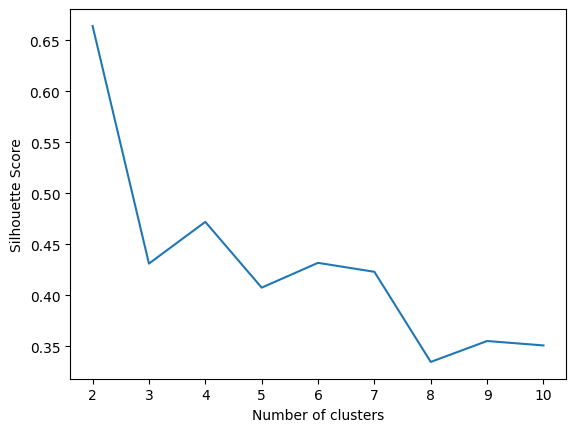

In [90]:
#let's see the silhouette score for different number of clusters
silhouette_scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    silhouette_scores.append(silhouette_score(X_train,kmeans.labels_))
#print the silhouette scores of different number of clusters
for i in range(0,len(silhouette_scores)):
    print("Silhouette score for {} clusters is {}".format(i+2,silhouette_scores[i]))

#let's plot the silhouette scores
plt.plot(range(2,11),silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


Since the silohuette score of clusters 4 is the highest before it starts to drop, we can say that the optimal number of clusters is 4.

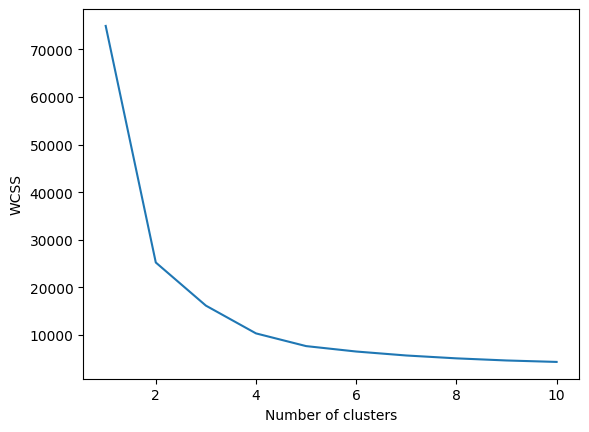

In [91]:
# let's use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [93]:
# our optimal number of clusters with respect to the silhouette score and elbow method is 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)
kmeans.cluster_centers_



array([[ 0.85384615, 39.55384615,  4.67692308,  3.53846154,  4.48461538,
         3.64615385,  3.86923077],
       [ 0.83695652, 28.0621118 ,  4.95962733,  3.53416149,  4.54192547,
         3.79347826,  3.89751553],
       [ 0.91176471, 51.55882353,  4.70588235,  3.55882353,  4.72058824,
         3.60294118,  3.86764706],
       [ 0.88655462, 21.05462185,  4.83613445,  3.45798319,  4.36554622,
         3.71428571,  3.92436975]])

In [94]:
kmeans.labels_


array([1, 3, 1, ..., 1, 1, 1])

In [95]:
kmeans.inertia_


10358.505800848769

In [96]:
silhouette_score(X_train,kmeans.labels_)

0.47203228064797614

In [98]:
# let's see the value counts of the labels
pd.Series(kmeans.labels_).value_counts()

1    644
3    238
0    130
2     68
Name: count, dtype: int64

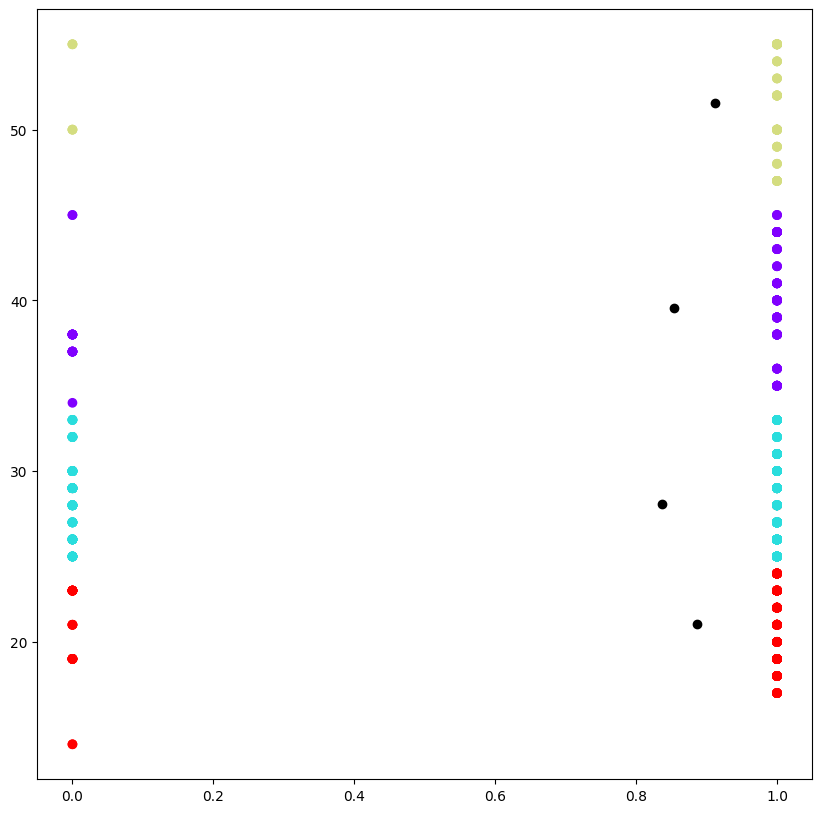

In [99]:
# let's plot the clusters
plt.figure(figsize=(10,10))

plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')



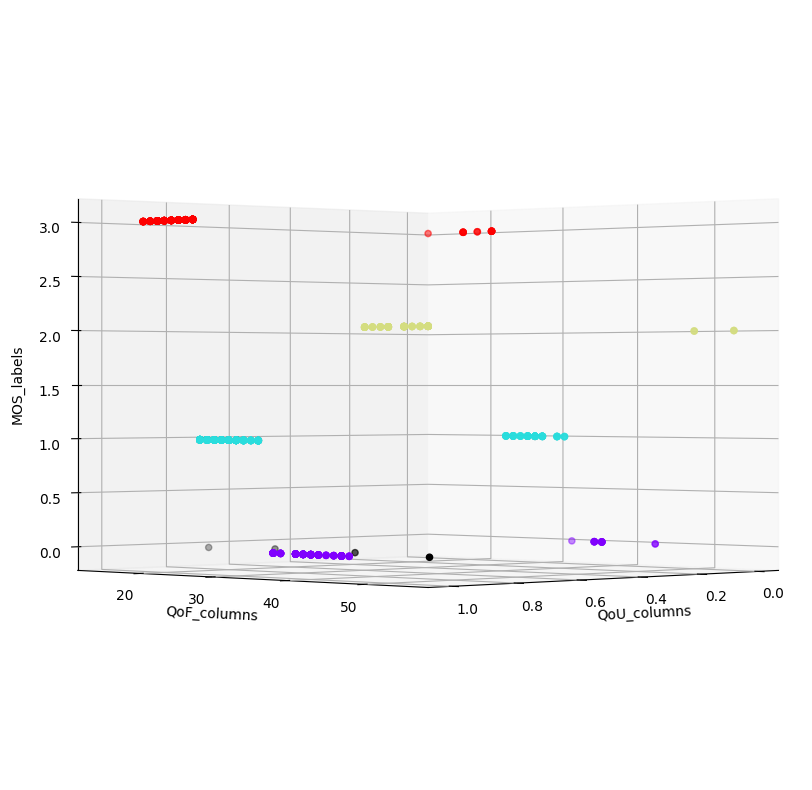

In [109]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

#we want all QoU columns in the x axis and all QoF columns in the y axis 
x = X_train.iloc[:,0]
y = X_train.iloc[:,1]
#while the z axis will be the labels
z = kmeans.labels_

ax.scatter(x, y, z, c=z, cmap='rainbow')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')

ax.set_xlabel('QoU_columns')
ax.set_ylabel('QoF_columns')
ax.set_zlabel('MOS_labels')


ax.view_init(0, 45)

plt.show()